# Introduction to Natural Language Processing with Python


## What is NLP?

Natural language processing is a way for computers to analyze, understand, and derive meaning from human language. With appropriate use and organization, NLP can be used to help developers perform a variety of tasks, including summarization, translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation for a given dataset or group of texts.

## What can we use it for?

Things like chatbots, voice-to-text software, and customer service sentiment analysis are examples of NLP applications. The use of (and development of tools for) NLP has experienced rapid growth over the last decade and is currently being integrated into a variety of fields. 

For example, a retailer on Amazon may run a sentiment analysis on all comments for a certain product. This could reveal general attitudes towards both the company and the item in question, ultimately leading to improvements and adjustments. On another hand, Siri, Apple's personal voice assistant, is the almagamation of years of work in NLP - Siri can recognize, conceptualize, and respond to a wide array of questions and comments. This not only improves the iPhone user experience in general but also increases the accessibility of the product.

## Basic Terminology

__Corpus__ (plural: corpora) is defined as a large collection of liguistic data. In other words, corpora serve as our datasets, or our information to process and train models on.

__Tokenization__ is the process of segmenting text into words, phrases, sentences etc. This is one of the first steps in processing the text into workable components.

__Part-of-speech (POS) tagging__ involves assigning word types (parts of speech) to tokens, like _verb_, _noun_, _preposition_, etc. 

__Dependency Parsing__ is the process of assigning syntactic dependency labels that describe the relations between individual tokens. For example, in the sentence _The brown dog ran through the park_, dependency parsing would recognize that _brown_ is modifying the subject of the sentence, _dog_.

__Lemmatization__ is defined as assigning the base form of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is "rat".

__Sentence Boundary Detection (SBD)__ is responsible for finding and segmenting individual sentences within a text. 

__Named Entity Recognition (NER)__ involves labelling named “real-world” objects, like persons, companies, or locations. For example, in some instances, we want "Amazon" to be recognized as an electronic company as opposed to the rainforest.

__Similarity__ is the process of comparing words, phrases, and documents to see how similar they are to each other. This is usually done using the cosine similarity between two vectors.


# spaCy

`spaCy` describes itself as industrial strength natural language processing in Python. It's designed to work with the rest of the Python AI ecosystem including `TensorFlow`, `PyTorch`, `scikit-learn`, `Gensim`. Though a little less known than NLTK, spaCy tends to be a little faster and functions well for large-scale information processing:

## NLTK vs spaCy Time Comparison
<img src="img/nltk_spacy.png">
source: https://blog.thedataincubator.com/2016/04/nltk-vs-spacy-natural-language-processing-in-python

## NLP Package Comparisons
There's a variety of NLP libraries available, each with its own strengths and weaknesses. 
<img src="img/spacy_comp.png">
source: https://spacy.io/usage/facts-figures

In [1]:
import spacy
from spacy import displacy

We begin by importing the necessary packages, `spaCy` being the most notable. We then load the English statistical model (which is set up as its own python package) - this is the main program we will be working with. Using a model for a specific language enables `spaCy` to predict linguistic annotations – for example, whether a word is a verb or a noun. Though some of spaCy's features are available without a language model, most of its functions require one. 

In [2]:
nlp = spacy.load('en')

First, we'll walk through some of the basic functions of spaCy, based on the definitions above. We begin by reading in a few simple sentences, just to get a feel for how the package works.

In [3]:
doc = nlp("I'm having such a wonderful day in Ann Arbor! It is sunny out and there are flowers. Do you want to get some ice cream with Ms. Ellen?")

> When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer.

![spacy_pipeline](img/pipeline.svg)

You can create your own customize processing pipeline by removing or adding new processes but we do not cover that in this workshop.

## Tokenizing

When we read something in with `nlp`, spaCy automatically tokenizes it. For example, it breaks _I'm_ into _I_ and _'m_, and each word is its own element. The `doc` object can be indexed to access individual tokens. 

In [4]:
for i, token in enumerate(doc[:15]):
    print(i, token)

0 I
1 'm
2 having
3 such
4 a
5 wonderful
6 day
7 in
8 Ann
9 Arbor
10 !
11 It
12 is
13 sunny
14 out


We can also see how well the sentence boundary detection works. We view all the individual sentences from the paragraph by iterating through the `sents` attribute.

In [5]:
for sent in doc.sents:
    print(sent)

I'm having such a wonderful day in Ann Arbor!
It is sunny out and there are flowers.
Do you want to get some ice cream with Ms. Ellen?


You can look at the token tags and POS using the `tag_` and `pos_` attributes. If you leave off the `_`, you will get the integer equivalent. A `token` object has a lot of attributes. Here we just look at a few. We'll use `pandas` to put it in a DataFrame for easier visualization. 

In [6]:
import pandas as pd
list_tokens = []
for token in doc:
    list_tokens.append((token.text, token.lemma_, token.pos_, token.shape_, token.dep_, token.is_stop, token.is_sent_start))
df = pd.DataFrame(list_tokens, columns=['text','lemma','POS','tag','dependency','stopword','sentence_start'])
df

,text,lemma,POS,tag,dependency,stopword,sentence_start
0,I,-PRON-,PRON,X,nsubj,False,None
1,'m,be,VERB,'x,aux,False,None
2,having,have,VERB,xxxx,ROOT,False,None
3,such,such,ADJ,xxxx,predet,True,None
4,a,a,DET,x,det,True,None
5,wonderful,wonderful,ADJ,xxxx,amod,False,None
6,day,day,NOUN,xxx,dobj,False,None
7,in,in,ADP,xx,prep,True,None
8,Ann,ann,PROPN,Xxx,compound,False,None
9,Arbor,arbor,PROPN,Xxxxx,pobj,False,None


You can look at the named-entities using the `ent` attributes and iterating through them.

In [7]:
for entity in doc.ents:
   print(entity.text, entity.label_)

Ann Arbor GPE
Ellen PERSON


### spaCy `explain`

Since `spaCy` is filled with plenty of useful tools, it's easy not to know or lose track of what all the different abbreviations stand for. The `spacy.explain` method can be used to get the description for some of the abbreviations.

In [8]:
part_of_speech = ['GPE','ADP','dobj','cc']
for pos in part_of_speech:
    print('{} : {}'.format(pos, spacy.explain(pos)) )

GPE : Countries, cities, states
ADP : adposition
dobj : direct object
cc : coordinating conjunction


# Exercise

Print out all the proper nouns (PROPN) and persons (PERSON) in this paragraph.

In [9]:
paragraph = 'Shapovalov arrived in the Spanish capital without an ATP World Tour match win on clay. In fact, he owned just a 1-4 clay-court record on the ATP Challenger Tour. But the Canadian found some of his best tennis to become the youngest quarter-finalist and semi-finalist in event history. Against Zverev, he was attempting to become the youngest Masters 1000 finalist since 18-year-old Richard Gasquet battled to the championship match at Hamburg in 2005.'

In [10]:
# write Solution Here
par = nlp(paragraph)
for token in par:
    if token.pos_ == 'PROPN':
        print(token.text)
print('Now, people:')
for ent in par.ents:
    if ent.label_ == 'PERSON':
        print(ent.text)

Shapovalov
ATP
World
Tour
ATP
Challenger
Tour
Canadian
Zverev
Richard
Gasquet
Hamburg
Now, people:
Shapovalov
Against Zverev
Richard Gasquet


## Visualization

`spaCy` has a built-in visualization package called `displaCy` that plots sentence dependencies and entity recognition.

### Dependency

Dependency parsing is the process of analyzing a sentence and assigning a syntactic structure to it: labeling the subject, the verb, etc., and how the different elements of the sentence depend on one another.

In [11]:
doc = nlp('The quick brown fox jumped over the lazy dog.')
options={'distance':90}
displacy.render(doc, style='dep', jupyter=True, options=options)

### Entity Recognition

Here is how `displaCy` works for named-entity recognition.

In [12]:
doc2 = nlp("TD Ameritrade, ProQuest, Google, Domino's and the University of Michigan are companies that hire data scientists in Ann Arbor")
colors = {'GPE': 'linear-gradient(0deg, #deebf7, #3182bd)',
         'ORG': 'linear-gradient(90deg, #fee6ce, #e6550d)'}
options = {'colors': colors}
displacy.render(doc2, style='ent', jupyter=True, options=options)

We can see there are a couple of errors. It thinks _TD Ameritrade_ is a person instead of an organization and _Domino_ is a geopolitical entity (i.e. place) instead of an organization. Since the named-entity parser is a statistical model making a prediction, we would need to train it some more to correct these errors.

For additional visualization options, visit https://spacy.io/usage/visualizers. 

## Word Count

Here is a list of tokenized words without the punctuation using a list comprehension. For large text, you should use a generator comprehension to save memory.

In [13]:
doc = nlp('Knox in box. Fox in socks. Knox on fox in socks in box. Socks on Knox and Knox in box.')
w = [token.text for token in doc if token.is_punct == False]

There is no special function in `spaCy` to count words. We just use the `Counter` class in Python with the spaCy `token` object

In [14]:
from collections import Counter
freq = Counter(w)
freq.most_common(10)

[('in', 5),
 ('Knox', 4),
 ('box', 3),
 ('socks', 2),
 ('on', 2),
 ('Fox', 1),
 ('fox', 1),
 ('Socks', 1),
 ('and', 1)]

# `textacy` and N-grams

There is no built-in method in spaCy to do generalized N-grams. Luckily, other packages have been built upon `spaCy` to do such processing. One of them is `textacy`. We can create a dictionary of N-grams and their frequency. We can also do more than one N-gram at a time with a single call.

In [15]:
import textacy
tdoc = textacy.Doc(doc)
kwargs = {'filter_stops':False}
bow = tdoc.to_bag_of_terms(ngrams=(1,2,3), normalize='lemma', as_strings=True, **kwargs)
bow

{'and': 1,
 'and knox': 1,
 'and knox in': 1,
 'box': 3,
 'fox': 2,
 'fox in': 2,
 'fox in sock': 2,
 'in': 5,
 'in box': 3,
 'in sock': 2,
 'in sock in': 1,
 'knox': 4,
 'knox and': 1,
 'knox and knox': 1,
 'knox in': 2,
 'knox in box': 2,
 'knox on': 1,
 'knox on fox': 1,
 'on': 2,
 'on fox': 1,
 'on fox in': 1,
 'on knox': 1,
 'on knox and': 1,
 'sock': 3,
 'sock in': 1,
 'sock in box': 1,
 'sock on': 1,
 'sock on knox': 1}

We can then use a standard Python `Counter` to keep track of them.

In [16]:
freq = Counter(bow)
freq.most_common(10)

[('in', 5),
 ('knox', 4),
 ('sock', 3),
 ('box', 3),
 ('in box', 3),
 ('knox in box', 2),
 ('fox in', 2),
 ('fox in sock', 2),
 ('fox', 2),
 ('on', 2)]

## Exercise

Here is some Python code to read in the Dr. Seuss book, _Fox in Socks_.

In [17]:
import requests
R = requests.get('http://ai.eecs.umich.edu/people/dreeves/Fox-In-Socks.txt')
book = R.text
book = book.replace('\n\n','').replace('\n',' ').replace('  ',' ')

What are the 10 most common words, bigrams, trigrams, or 4-grams in the book, _Fox in Socks_, once you filter out stopwords? 

In [18]:
# Put Solution Here
nlp_bk = nlp(book)
tx_bk = textacy.Doc(nlp_bk)
kwargs = {'filter_stops':True}
bow = tx_bk.to_bag_of_terms(ngrams=(1,2,3,4), normalize='lemma', as_strings=True, **kwargs)
freq = Counter(bow)
freq.most_common(10)

[('sir', 36),
 ('-PRON-', 23),
 ("'s", 23),
 ('sock', 17),
 ('beetle', 15),
 ('fox', 15),
 ('knox', 15),
 ('battle', 12),
 ('sew', 11),
 ('not', 11)]

# Word Similarity

> Similarity is determined by comparing word vectors or "word embeddings", multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec.

In [19]:
# Example here
doc = nlp('two six sick chicks')
words = len(doc)
for i in range(words):
    for j in range(i+1,words):
        token1 = doc[i]
        token2 = doc[j]
        print(token1, token2, token1.similarity(token2))

two six 0.672846
two sick 0.0718134
two chicks 0.0214334
six sick 0.289106
six chicks 0.0575883
sick chicks 0.298852


Here is the word vector for the word chicks.

In [20]:
print(token2.text, token2.vector.shape, token2.vector)

chicks (384,) [  9.55344796e-01   1.25301361e+00   3.85179400e+00   6.45237923e-01
  -1.63090324e+00   3.60614777e-01  -4.32127953e+00   1.57091594e+00
   4.30313498e-01  -7.96505690e-01   1.78313828e+00  -3.56821865e-01
   6.81392848e-01   1.41243905e-01   2.30763316e+00   4.23232317e-02
  -2.51061249e+00   7.29276896e-01  -7.81416416e-01  -3.40388393e+00
   8.78293514e-01   2.60295820e+00  -9.26705599e-01  -1.15090966e-01
  -2.48714042e+00   4.83663559e-01  -2.19940948e+00  -2.39275193e+00
  -1.03995574e+00   3.05410433e+00  -2.18665457e+00   4.39681387e+00
   1.25002241e+00   1.00378835e+00  -2.80383080e-01  -2.28881717e+00
  -6.37936592e-01   8.61515701e-02  -2.69418001e+00   1.98078349e-01
   3.70216894e+00   4.16304970e+00   3.04885745e+00  -2.53899425e-01
  -1.89209878e+00   2.68161130e+00   4.15394831e+00  -8.85104120e-01
   5.36967993e+00  -8.09246600e-02  -2.19703197e+00  -1.31723273e+00
  -2.65883756e+00  -5.31380892e-01  -1.81385410e+00  -2.64382005e+00
  -2.14884424e+00  -

We can get the same value by using the formula for cosine similiarity 

In [21]:
import numpy as np
v1 = token1.vector
v2 = token2.vector
similarity = np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))
similarity

0.29885164

**Tip**: spaCy recommends that if you want to use real word vectors, you should download the large language model version (e.g. **en_core_web_lg** for english) using the command `python -m spacy download en_core_web_lg`. 

The large models have already been downloaded on the lab PCs. Just use `nlp = spacy.load('en_core_web_lg')` to load the large language model. It's about 23x larger than the small model so it might take longer to load.

# Exercise

Re-run the word similarity example using the large english language model. Notice how the similiarity measures have changed. Add a fake word to the document. What is the similiarity of a real word to a fake word?  

In [22]:
# Solution
nlp = spacy.load('en_core_web_lg')
doc = nlp('two six sick chicks adsfs')
token1 = doc[2]
token2 = doc[4]
print(token1, token2, token1.similarity(token2))

sick adsfs 0.0


In [23]:
token1 = doc[1]
token2 = doc[0]
print(token1, token2, token1.similarity(token2))

six two 0.850336


**Tip**: You can check if a word has a vector in the large model using the `has_vector` or `is_oov` (is out-of-vocabulary) attribute:

In [24]:
doc = nlp('fake news word fakenews fakeword')
for token in doc:
    print(token.text, token.has_vector, token.is_oov)

fake True False
news True False
word True False
fakenews False True
fakeword False True


# Gensim

`Gensim` is described as topic modelling for humans, is a powerful vector space modeling and topic modeling toolkit, commonly used for a variety of NLP tasks. 

## Word2Vec

`Word2vec` is a collection of related models that are used to produce word embeddings. `Gensim` requires a list of list representing tokens in sentences in the document to create a `Word2Vec` model

In [25]:
sentences=[]
doc = nlp(book)
for sentence in doc.sents:
    sentences.append([token.text.lower() for token in sentence 
                 if token.is_punct == False and token.is_stop == False and token.text not in ["\n","'s"]])

In [26]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, size=100, window=5, min_count=2, workers=1)

C:\Users\Public\Desktop\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [27]:
print(model)

Word2Vec(vocab=144, size=100, alpha=0.025)


Here is the list of words in our vocabulary.

In [28]:
words = list(model.wv.vocab)
print(words)

['licks', 'luck', 'easy', 'very', 'stop', 'flew', 'ticks', 'puddle', 'the', 'trick', 'box', 'can', 'sew', 'tricks', 'muddle', 'what', 'say', 'poodle', 'sue', 'bim', 'whose', 'sews', 'knox', 'mr', 'fleas', 'play', 'gluey', 'a', 'paddles', "n't", 'luke', 'ben', 'so', 'let', 'trees', 'goo', 'please', 'i', 'mouth', 'blocks', 'for', 'chew', 'freeze', 'three', 'of', 'is', ' ', 'comes', 'too', 'then', 'grows', 'this', 'blue', 'wo', 'nose', 'and', 'mr.', "'ll", 'fox', 'an', 'quick', 'make', 'bricks', 'these', 'clocks', 'sick', 'chicks', 'to', 'lakes', 'paddle', 'beetle', 'about', 'try', 'here', 'joe', 'their', 'six', 'game', 'you', 'battle', 'it', 'way', 'brings', 'bottle', 'my', 'find', 'choose', 'slow', 'in', 'tongue', 'hose', 'on', 'well', 'now', 'rose', 'tocks', 'breeze', 'eating', 'noodle', 'bent', 'such', 'crow', 'call', 'stack', 'goes', 'beetles', 'broom', 'have', 'sir', 'they', 'with', 'when', 'come', 'cheese', 'pig', 'freezy', 'we', 'socks', 'something', 'breaks', 'tick', 'likes', 'cl

Here is one of the word embeddings we've created. It is of length 100 as specified.

In [29]:
print(model.wv['chicks'].shape, model.wv['chicks'])

(100,) [ -3.94037459e-04   1.40867091e-03   3.86317377e-03   3.33988992e-03
   3.46797053e-03   4.69442486e-04   3.63330566e-03   4.84834984e-03
  -4.26633144e-03   1.89596764e-03  -9.47512279e-04  -2.35283165e-03
  -3.14024813e-03  -4.78306145e-04   1.28190382e-03  -1.72113476e-03
  -2.22792011e-03   4.91612544e-03   1.47956904e-04   3.58766317e-03
  -3.60798440e-03   3.66139598e-03   3.02284746e-03  -4.20298288e-03
  -2.01058298e-04   9.57279000e-04  -2.37189187e-03   4.11403086e-03
  -4.91261890e-05   3.04495101e-03  -2.30195862e-03   2.79311347e-03
   8.63684341e-04  -3.71442037e-03  -3.49517260e-03  -4.46825661e-03
  -9.63450060e-04   1.72431779e-03   2.35465379e-03  -1.25826651e-03
   3.51140392e-03   4.81971726e-03   4.32801340e-03  -2.35954329e-04
   5.58379339e-04  -4.20792168e-03   1.25738315e-03   4.40374017e-04
   1.20981678e-03   1.90004159e-03   2.96909222e-03   1.24282076e-03
  -4.00828430e-03  -4.27798368e-04  -1.03151026e-04   1.74235925e-03
   2.13148328e-03  -4.23019

Now we can do some word algebra (using the underlying word vectors) and other NLP word tasks.

`beetle + paddles - puddle = ?`

In [30]:
model.wv.most_similar(positive=['beetle', 'paddles'], negative=['puddle'])

[('with', 0.26707661151885986),
 ('beetles', 0.21306318044662476),
 ('when', 0.20020842552185059),
 ('tongue', 0.1996091902256012),
 ('their', 0.19807802140712738),
 ('quick', 0.19547176361083984),
 ('say', 0.19538463652133942),
 ('goo', 0.16940099000930786),
 ('sir', 0.16706009209156036),
 ('cheese', 0.15601634979248047)]

In [31]:
model.wv.doesnt_match("goose duck beetle puddle".split())

'goose'

In [32]:
model.wv.similarity('sick','chicks')

0.011861226191750146

## Word2Vec Visualization

Lets fit a 2-D PCA model to the word embeddings for visualization purposes.

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
X = model.wv[model.wv.vocab]
pca = PCA(n_components=2)
new_vectors = pca.fit_transform(X)

And plot the resulting vector onto our new 2-dimensional projection from our 100-dimensional vector we started with.

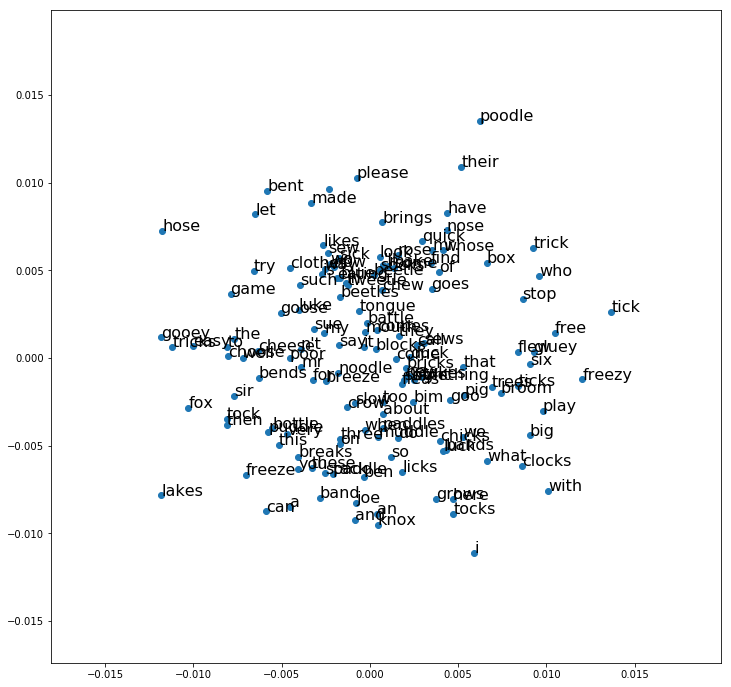

In [35]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(new_vectors[:,0], new_vectors[:, 1])
for i, word in enumerate(model.wv.vocab):
    plt.annotate(word, xy=(new_vectors[i,0], new_vectors[i,1]), size=16)

# Topic Modeling

One branch of NLP is topic modeling - a topic model is a kind of statistical model that is used to uncover the abstract topics and concepts that occur in a collection of documents. Topic modeling is frequently used to discover semantic structures in a text body, and as a data-mining tool to better understand large collections of data.

Now that we've seen how spaCy processes short text segments, let's explore what happens (and what we can work with) when we examine a much larger document. To work with topic modeling, we'll begin by using `spaCy` to tokenize a text file containing US news articles.

In [36]:
%%time
filename = 'en_US.news.txt'
with open(filename, 'r', encoding='utf-8') as fin:
    data = fin.read()
data = data[:900000]

Wall time: 1.63 s


Unfortunately, there are some bugs in spaCy's medium and large language models for English - the stopwords appear to be missing. There are currently a few work-arounds available (visit https://github.com/explosion/spaCy/issues/922 to see the full explanations). For now, to avoid complications related to this issue, we will reload the small language model before tokenizing our data.

In [37]:
nlp = spacy.load('en')

In [38]:
%%time
news = nlp(data)

Wall time: 1min 8s


As with any large text, we can't start analysis until we clean the data. This involves removing unimportant words and punctuation, begin by removing __stopwords__, which are commonly used words that have little value in determining sentiment or analyzing a document. Filtering out words like ‘the’, ‘is’, and ‘are’ helps speed up processes and helps keep the data clean while allowing us to focus on more significant/rarer terms. Luckily, each token has the built-in property `is_stop` to indicate whether or not it is considered a stopword.

Sometimes, in addition to removing stopwords, we'll want to remove punctuation from a piece. We may also choose to convert all words to lowercase or standardize dates and times. Note that the cleaning process will not be the same for every text or even for every analysis of the same text - sometimes we care about capitalization and punctuation as part of the sentiment and topic modeling analysis. For now, though, we'll remove the punctuation. We'll also remove any newline and possessive characters.

We need to create a list of lists for the tokens in each sentence for the next section.

In [39]:
text=[]
for sentence in news.sents:
    text.append([token.text for token in sentence 
                 if token.is_punct == False and token.is_stop == False and token.text not in ["\n","'s","The"]])
text[:5]

[['He', "n't", 'home', 'apparently'],
 ['St.', 'Louis', 'plant', 'close'],
 ['It', 'die', 'old', 'age'],
 ['Workers',
  'making',
  'cars',
  'onset',
  'mass',
  'automotive',
  'production',
  '1920s'],
 ['WSU', 'plans', 'quickly', 'hot', 'topic', 'local', 'online', 'sites']]

Note that one of the work-arounds available for the missing stopwords issue (in the large English model) is to load the `NLTK` stopword list and filter based on that. This involves downloading a separate library (and some additional files) and importing it like so:
> `from nltk.corpus import stopwords
stp = set(stopwords.words('english'))`

From there, you can filter by only seleting tokens based on `not in stp`.

## LDA

Now that we've prepared our information for analysis, we'll use `gensim` to perform topic modelling. 

In [40]:
from gensim import corpora, models

We begin by creating a `gensim` dictionary containing (key, value) pairs which represent (word, integer id) respectively.

In [41]:
dictionary = corpora.Dictionary(text)
dictionary.token2id

{'oriented': 4315,
 'decrying': 7750,
 'Hall': 1731,
 'recent': 1766,
 'Indianapolis': 16907,
 'cotton': 19428,
 'Hooley': 13037,
 'valentine': 11982,
 'Preschool': 15611,
 'Jarrett': 5551,
 'Slauson': 21580,
 'Art': 9581,
 'anticancer': 13290,
 'cooling': 8352,
 'supposed': 1060,
 'Prevention': 16035,
 'drill': 14208,
 'pears': 8619,
 'map': 797,
 'breezy': 20890,
 'interests': 1081,
 'employer': 6633,
 'Woodlawn': 20573,
 'Bound': 16005,
 '11/5/2010': 19820,
 'rises': 15274,
 'prepares': 6569,
 'SOR': 15040,
 'discounted': 4985,
 'Serbia': 7948,
 'Stotik': 2663,
 'Albright': 6158,
 'regard': 12604,
 'dispatch': 7888,
 'rush': 14079,
 'wrap': 9350,
 'Schiano': 1503,
 'proponents': 20820,
 'hated': 685,
 'tweaked': 15607,
 '9/11': 17743,
 '16th': 6000,
 'voluminous': 9037,
 'appellate': 3536,
 'GM': 211,
 'wording': 19633,
 'DeGeeter': 1697,
 'persona': 14039,
 'exquisite': 7882,
 'wholly': 3178,
 '18-$24': 5681,
 'wheaty': 4984,
 'detailing': 3750,
 'overly': 4169,
 'mill': 21398,
 'M

> To convert documents to vectors, we’ll use a document representation called bag-of-words. In this representation, each document is represented by one vector where each vector element represents a question-answer pair, in the style of:

> “How many times does the word system appear in the document? Once.”

The method `doc2bow` converts the document to a bag-of-words model by counting the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector.

In [42]:
corpus = [dictionary.doc2bow(txt) for txt in text]
corpus[:3]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1), (10, 1), (11, 1)]]

Latent Dirichlet Allocation (LDA) is a generative statistical model. It is a pattern recognition and machine learning technique that works to find a linear combination of features that characterizes two or more classes of objects. We use it here to try to identify topics in our corpus.

In [43]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=15)

Below, we call `show_topics` to view N topics chosen randomly. Each topic contain the top 10 keywords that the LDA model has found. The word's coefficients represents its weight and the words are listed in descending order by weight.

In [44]:
lda.show_topics()

[(3,
  '0.028*"It" + 0.013*"said" + 0.008*"good" + 0.006*"’s" + 0.006*"time" + 0.005*"$" + 0.004*"going" + 0.004*"goal" + 0.004*"took" + 0.004*"day"'),
 (6,
  '0.010*"said" + 0.008*"\'ll" + 0.006*"1" + 0.005*"I" + 0.005*"0" + 0.005*"But" + 0.004*"year" + 0.004*"come" + 0.004*"At" + 0.004*"It"'),
 (1,
  '0.011*"I" + 0.009*"said" + 0.009*"We" + 0.009*"A" + 0.007*"year" + 0.006*"School" + 0.005*"point" + 0.005*"running" + 0.004*"\'ve" + 0.004*"game"'),
 (5,
  '0.007*"today" + 0.006*"students" + 0.005*"America" + 0.004*"heat" + 0.003*"earlier" + 0.003*"including" + 0.003*"But" + 0.003*"medium" + 0.003*"February" + 0.003*"Western"'),
 (13,
  '0.027*"I" + 0.017*"said" + 0.009*"going" + 0.008*"\'re" + 0.008*"\'m" + 0.007*"We" + 0.006*"years" + 0.005*"district" + 0.004*"ago" + 0.004*"But"'),
 (10,
  '0.009*"You" + 0.008*"No" + 0.007*"said" + 0.007*"different" + 0.006*"I" + 0.006*"It" + 0.005*"But" + 0.005*"n\'t" + 0.005*"want" + 0.005*"hard"'),
 (0,
  '0.038*"I" + 0.023*"said" + 0.012*"He" + 0

From these buzzwords, we can infer what general concept each "topic" is talking about. Take a minute to think about what each collection of keywords represents.

## Streaming Text

Above, we abbreviated the text document for time and memory sake. `spaCy` will complain if you try to feed it more than a 1 million character string. We can get around the memory issue by streaming the text one line at a time with the following generator function to achieve the same objective.

In [45]:
def sentence_generator(filename, nlp):
    for line in open(filename, 'r', encoding='utf-8'):              
        news = nlp(line)
        for sentence in news.sents:
            yield [token.text for token in sentence 
                   if token.is_punct == False and token.is_stop == False and token.text not in ["\n","'s","The"]]

We create a generator by calling the function. The function returns a generator object (iterator) which we can iterate over (one value at a time) using `next` or a `for` loop.

In [46]:
memory_friendly_text = sentence_generator(filename,nlp)
memory_friendly_text

<generator object sentence_generator at 0x0000020BA0956CA8>

Let's print out the contents.

In [47]:
print(next(memory_friendly_text))
print(next(memory_friendly_text))
print(next(memory_friendly_text))
print(next(memory_friendly_text))

['He', "n't", 'home', 'apparently']
['St.', 'Louis', 'plant', 'close']
['It', 'die', 'old', 'age']
['Workers', 'making', 'cars', 'onset', 'mass', 'automotive', 'production', '1920s']


To use it when constructing a LDA model replace the variable `text` with the generator object `memory_friendly_text`.

## Visualization for Topic Modeling

Now that we have our topics and our keyword collections, we can present them in a visualization to get a different view on how important each topic is to the overall document, and how closely these topics are related. We will use the `pyLDAvis` library which is a port of the R package LDAvis.

In [48]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

pyLDAvis is compatible with `gensim`, `scikit-learn`, and `GraphLab Create`. Here is how you would use it with `gensim`. We need a `gensim` LDA model, corpus and dictionary - we'll use the ones we've just built.

In [49]:
viz = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
viz

C:\Users\Public\Desktop\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
0      8.245522        1       1  0.133928  0.083450
11     7.677340        1       2  0.062824  0.070892
7      7.517303        1       3  0.085942 -0.077893
13     7.231168        1       4  0.117511 -0.008458
4      7.144023        1       5 -0.024362  0.152750
1      7.028219        1       6  0.100198 -0.035179
3      6.652976        1       7 -0.053045 -0.003739
6      6.388057        1       8  0.013066 -0.017296
2      6.356759        1       9 -0.055806 -0.115829
8      6.273339        1      10 -0.072628  0.101353
10     6.060524        1      11  0.014193 -0.054747
9      6.005803        1      12 -0.066581  0.020065
14     5.968763        1      13 -0.117824 -0.021219
12     5.751683        1      14 -0.027722 -0.127918
5      5.698520        1      15 -0.109695  0.033767, topic_info=      Category        Freq           Term       Total  loglift  logprob
term                                                                   
177    Default  730.000000              I  730.000000  30.0000  30.0000
143    Default  295.000000             It  295.000000  29.0000  29.0000
2757   Default  354.000000              $  354.000000  28.0000  28.0000
16950  Default  130.000000        percent  130.000000  27.0000  27.0000
13674  Default  894.000000           said  894.000000  26.0000  26.0000
8971   Default  362.000000            n't  362.000000  25.0000  25.0000
19372  Default  197.000000             We  197.000000  24.0000  24.0000
16468  Default   76.000000           p.m.   76.000000  23.0000  23.0000
17339  Default   68.000000            You   68.000000  22.0000  22.0000
1877   Default  109.000000            old  109.000000  21.0000  21.0000
20596  Default  133.000000          going  133.000000  20.0000  20.0000
3062   Default  148.000000              1  148.000000  19.0000  19.0000
9127   Default  119.000000        million  119.000000  18.0000  18.0000
19091  Default   90.000000          think   90.000000  17.0000  17.0000
9341   Default   77.000000             'm   77.000000  16.0000  16.0000
2072   Default   69.000000             No   69.000000  15.0000  15.0000
15269  Default   52.000000            'll   52.000000  14.0000  14.0000
1264   Default   94.000000            're   94.000000  13.0000  13.0000
14914  Default  100.000000           good  100.000000  12.0000  12.0000
19423  Default   60.000000          today   60.000000  11.0000  11.0000
12488  Default   46.000000      different   46.000000  10.0000  10.0000
4772   Default  260.000000             He  260.000000   9.0000   9.0000
6795   Default   39.000000            boy   39.000000   8.0000   8.0000
7648   Default   48.000000       students   48.000000   7.0000   7.0000
9814   Default   83.000000            've   83.000000   6.0000   6.0000
21016  Default   52.000000         School   52.000000   5.0000   5.0000
16707  Default   43.000000           Park   43.000000   4.0000   4.0000
108    Default   86.000000              2   86.000000   3.0000   3.0000
2783   Default  152.000000              A  152.000000   2.0000   2.0000
11212  Default   44.000000           look   44.000000   1.0000   1.0000
...        ...         ...            ...         ...      ...      ...
481    Topic15   20.002355           heat   23.083022   2.7217  -5.5387
13459  Topic15   15.926514         choice   18.371358   2.7222  -5.7665
3076   Topic15   16.462134       February   19.550553   2.6930  -5.7335
2774   Topic15    9.299548      receiving   10.624517   2.7318  -6.3045
8349   Topic15   12.063333             de   14.156854   2.7049  -6.0443
2042   Topic15   11.299853          dress   13.211960   2.7086  -6.1097
2765   Topic15    9.831321  opportunities   11.313303   2.7246  -6.2489
14637  Topic15   11.838956          knows   14.107827   2.6896  -6.0631
19636  Topic15   14.830251           Lake   18.769545   2.6294  -5.8378
8633   Topic15   24.010299      

Each bubble on the large plot represents a topic. The larger the bubble, the more frequently that topic is referenced. Ideally, we want large topic bubbles that are well separated and do not overlap with one another. A model with too many topics will have many overlaps and will be made up of many small sized bubbles clustered in one region of the chart. It appears that this particular dataset (with this analysis) doesn't have as clear separations as we'd like, and falls into the "too many topics" category.

The visualization is also interactive - if you hover over a bubble, it highlights the terms that the topic includes, and shows their frequency (both overall and within the selected topic).

Visit https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ for additional resources and work with topic modelling in `Gensim`.

## Sentiment Analysis

`TextBlob` is another NLP library in Python. It is written entirely in Python, which docks its performance speed and high-processing ability a bit. TextBlob is a bit of a "best of the best" toolkit - it pulls some of the most effective and useful methods from packages like NLTK and Pattern. Here, we'll use it to perform sentiment analysis.

In [50]:
from textblob import TextBlob

In [51]:
flowers = TextBlob('These flowers are beautiful, they brighten up the place so much! I really love them.')
angry = TextBlob("You make me so angry; I just can't stand it.")

The `sentiment` attribute of a TextBlob "returns a tuple of the form (polarity, subjectivity) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective."

Let's break this into its two parts: polarity and subjectivity. Polarity analysis takes into account the amount of positive or negative terms that appear in a given sentence - words like "beautiful" and "brighten" likely contribute to a higher score, while words like "angry" and "can't" would shift the polarity in a negative direction. Subjectivity, on the other hand, is almost like an error bound on the sentiment analysis. The subjectivity of words and phrases may depend on their context and an objective document may contain subjective sentences. Words and phrases that are labeled as more subjective may shift their polarity depending on their context, making it more difficult to determine the true sentiment of the phrase.

In [52]:
print(flowers.sentiment)
print(angry.sentiment)

Sentiment(polarity=0.675, subjectivity=0.8)
Sentiment(polarity=-0.5, subjectivity=1.0)


To see the breakdown of the numbers, we can use the `sentiment_assessments` attribute to view which words contributed to the polarity and subjectivity scores. The overall score is the average of each tuple in the assessment.

In [53]:
print(flowers.sentiment_assessments)
print(angry.sentiment_assessments)

Sentiment(polarity=0.675, subjectivity=0.8, assessments=[(['beautiful'], 0.85, 1.0, None), (['much', '!', 'really', 'love'], 0.5, 0.6, None)])
Sentiment(polarity=-0.5, subjectivity=1.0, assessments=[(['angry'], -0.5, 1.0, None)])


## Exercise

Test out a couple of different sentences and examine their sentiment analysis output. Try to write:
* A sentence that scores a neutral polarity (aim for a range in [-0.2, 0.2])
* A sentence that scores as highly _objective_
* A sentence that scores as highly _subjective_

In [54]:
#Solution
neutral = TextBlob("It doesn't matter to me much.")
print(neutral.sentiment_assessments)
obj = TextBlob("The dog is blue.")
print(obj.sentiment_assessments)
subj = TextBlob("I guess it depends on whether she's happy or sad.")
print(subj.sentiment_assessments)

Sentiment(polarity=0.2, subjectivity=0.2, assessments=[(['much'], 0.2, 0.2, None)])
Sentiment(polarity=0.0, subjectivity=0.1, assessments=[(['blue'], 0.0, 0.1, None)])
Sentiment(polarity=0.15000000000000002, subjectivity=1.0, assessments=[(['happy'], 0.8, 1.0, None), (['sad'], -0.5, 1.0, None)])


### Sentiment Analysis for US News

Now that we've seen how TextBlob sentiment analysis works on a few lines of text, we can see what polarity and subjectivity scores it assigns to the news dataset that we've been working with.

In [55]:
news_txt = TextBlob(data)
sents = news_txt.sentiment_assessments

In [56]:
print(sents.polarity)
print(sents.subjectivity)
[word for word in sents]

0.10219093467161112
0.43409946705408897


[0.10219093467161112,
 0.43409946705408897,
 [(['apparently'], 0.05, 0.35, None),
  (['old'], 0.1, 0.2, None),
  (['quickly'], 0.3333333333333333, 0.5, None),
  (['hot'], 0.25, 0.8500000000000001, None),
  (['local'], 0.0, 0.0, None),
  (['most'], 0.5, 0.5, None),
  (['new'], 0.13636363636363635, 0.45454545454545453, None),
  (['center'], -0.1, 0.1, None),
  (['many'], 0.5, 0.5, None),
  (['potential'], 0.0, 1.0, None),
  (['last'], 0.0, 0.06666666666666667, None),
  (['total'], 0.0, 0.75, None),
  (['political'], 0.0, 0.1, None),
  (['action'], 0.1, 0.1, None),
  (['early'], 0.1, 0.3, None),
  (['more'], 0.5, 0.5, None),
  (['direct'], 0.1, 0.4, None),
  (['difficult'], -0.5, 1.0, None),
  (['absolutely', 'necessary'], 0.0, 1.0, None),
  (['serious'], -0.3333333333333333, 0.6666666666666666, None),
  (['enough'], 0.0, 0.5, None),
  (['definitely', 'not'], -0.0, 0.5, None),
  (['worse'], -0.4, 0.6, None),
  (['certain'], 0.21428571428571427, 0.5714285714285714, None),
  (['few'], -0.2,

# References

* spaCy: https://spacy.io/usage/spacy-101
* textacy: https://textacy.readthedocs.io/en/stable/
* Gensim: https://radimrehurek.com/gensim/intro.html
* TextBlob: http://textblob.readthedocs.io/en/dev/quickstart.html
* pyLDAvis: http://pyldavis.readthedocs.io/en/latest/